In [3]:
from functions import *
import matplotlib.pyplot as plt
import pickle
from parameters_ciuti import *

Plot linear spectrum and exciting field:

In [5]:
with open('results/ciuti/Qdim=700_Qmax=1.5_power0.00001_V_basic__n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_linear = pickle.load(input_file)[0]
abs_linear = get_absorption_SQW(pol_linear, t_c, tlist,omega_list, np.pi*hbar/(2*d_cv)*0.00001, 90, omega_0, n_medium, pulse_shape = 'gauss', method = 'lambert_beer')
E_w = fouriertrafo(gauss_pulse(tlist,0.00001, sigma, t_c), omega_list, tlist)
with open('results/ciuti/Qdim=700_Qmax=1.5_power0.00001_V_screened__n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_linear_sc = pickle.load(input_file)[0]
abs_linear_sc = get_absorption_SQW(pol_linear_sc, t_c, tlist,omega_list, np.pi*hbar/(2*d_cv)*0.00001, 90, omega_0, n_medium, pulse_shape = 'gauss', method = 'lambert_beer')
with open('results/ciuti/Qdim=700_Qmax=1.5_power0.00001_V_screened_d=15_linear_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_linear_sc_d15 = pickle.load(input_file)[0]
abs_linear_sc_d15 = get_absorption_SQW(pol_linear_sc_d15, t_c, tlist,omega_list, np.pi*hbar/(2*d_cv)*0.00001, 90, omega_0, n_medium, pulse_shape = 'gauss', method = 'lambert_beer')
#E_w = fouriertrafo(gauss_pulse(tlist,0.00001, sigma, t_c), omega_list, tlist)

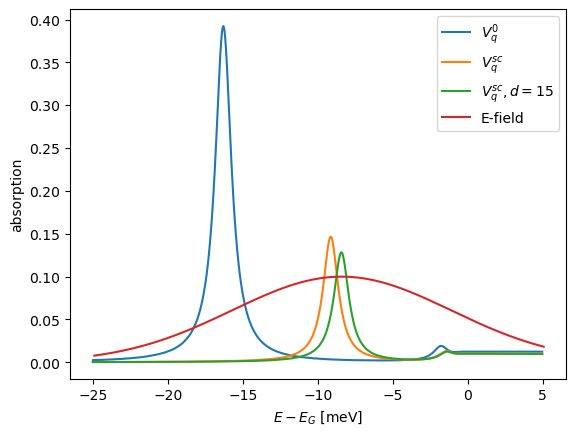

In [6]:
plt.plot(1000* hbar*(omega_list - 0.008513513513513512/hbar), abs_linear, label = r'$V_q^0$')
plt.plot(1000* hbar*(omega_list - 0.008513513513513512/hbar), abs_linear_sc, label = r'$V_q^{sc}$')
plt.plot(1000* hbar*(omega_list - 0.008513513513513512/hbar), abs_linear_sc_d15, label = r'$V_q^{sc}, d=15$')
plt.plot(1000* hbar*(omega_list - 0.00841341341341341/hbar), 10000*np.abs(E_w), label = 'E-field')
plt.ylabel('absorption')
plt.xlabel(r'$E-E_G$ [meV]')
plt.legend()

Find 1s-binding energy and use it to calculate E-field standard deviation and gamma_lattice

In [9]:
E_b = -hbar*(omega_list[np.argmax(abs_linear_sc_d15)]- 0.008513513513513512/hbar)
print('Exciton binding energy: ',E_b, ' eV')
sigma = 2*np.sqrt(np.log(2))/(0.24*E_b/hbar)
print('sigma: ',sigma, ' fs')
print('gamma_lattice = ', 0.07*E_b/hbar)

Exciton binding energy:  0.00841341341341341  eV
sigma:  542.7816788629135  fs
gamma_lattice =  0.0008947554337612708


Use pulse are and peak rabi energy to calculate E-field standard deviation:

In [10]:
print('sigma: ', 3/2 * hbar * np.pi/(np.sqrt(2*np.pi)*(0.4*E_b)))

sigma:  367.6926103285312


Plot both sigma and see, which version matches figure 1 from the paper best:

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


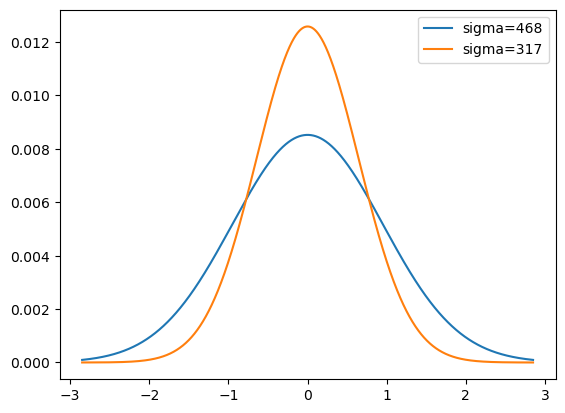

In [11]:
start = 26000
end = 54000
tlist_ = (tlist-4000)/(2*np.pi*hbar/E_b)
plt.plot(tlist_[start:end], gauss_pulse(tlist[start:end], 10, 468, 4000), label = 'sigma=468')
plt.plot(tlist_[start:end], gauss_pulse(tlist[start:end], 10, 317, 4000), label = 'sigma=317')
plt.legend()

Second one (orange) matches better.

Reproduce fig. 2b

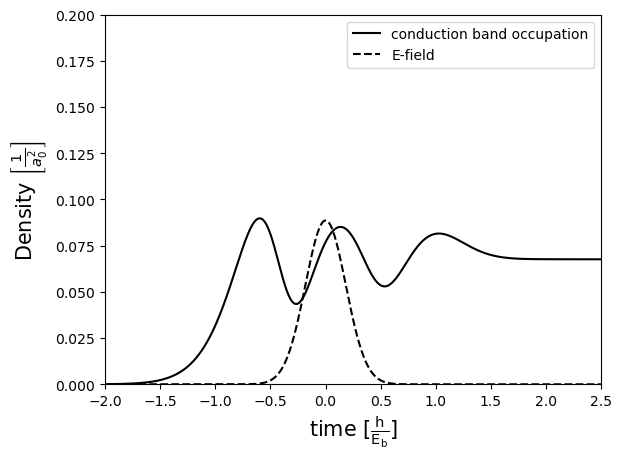

In [12]:
from parameters_ciuti import tlist, sigma
from parameters_general import bohr_radius
bohr_radius = 8
#crop data to pulse region
start = 17000
end = 43000
tlist_cropped = tlist[start:end]-t_c
tlist_cropped = tlist_cropped/(2*np.pi*hbar/E_b)

#with open('results/ciuti/Qdim=700_Qmax=1.5_power3V_basic_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle', 'rb') as input_file:
 #   V_basic = pickle.load(input_file)[0][start:end]
#with open('results/ciuti/Qdim=700_Qmax=1.5_power3_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle', 'rb') as input_file:
#    V_screened = pickle.load(input_file)[0][start:end]
#with open('results/ciuti/Qdim=700_Qmax=1.5_power3_V_screened__n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle', 'rb') as input_file:
 #   V_screened = pickle.load(input_file)[0][start:end]
#with open('results/ciuti/Qdim=700_Qmax=1.5_power3_V_screened_d=15_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle', 'rb') as input_file:
 #   V_screened_d15 = pickle.load(input_file)[0][start:end]
with open('results/ciuti/Qdim=700_Qmax=1.5_power3_V_screened_d=15_final_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle', 'rb') as input_file:
    V_screened_d15_final = pickle.load(input_file)[0][start:end]
#with open('results/ciuti/Qdim=700_Qmax=1.5_power3_V_basic__n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle', 'rb') as input_file:
 #   V_basic = pickle.load(input_file)[0][start:end]
#plt.plot(tlist_cropped, V_basic*bohr_radius**2, 'k--',label = 'V_basic')
#plt.plot(tlist_cropped, V_screened*bohr_radius**2, 'k-',label = 'V_screened')
#plt.plot(tlist_cropped, V_screened*bohr_radius**2, 'b-',label = 'sigma_338')
#plt.plot(tlist_cropped, V_screened_d15*bohr_radius**2, 'r-',label = 'V_screened_d15')
plt.plot(tlist_cropped, V_screened_d15_final*bohr_radius**2, 'k-',label = 'conduction band occupation')
#plt.plot(tlist_cropped, V_basic*bohr_radius**2, 'b--',label = 'V_basic')
plt.plot(tlist_cropped,2*gauss_pulse(tlist[start:end]-t_c, 10, sigma, 0),'k--', label = 'E-field')
plt.ylim(0,0.2)
plt.xlim(-2,2.5)
plt.xlabel(r'time [$\frac{\mathrm{h}}{\mathrm{E_b}}$]', fontsize = 15)
plt.ylabel(r'Density $\left[\frac{1}{a_0^2}\right]$',fontsize = 15)
plt.legend()
plt.savefig('results/ciuti/figure2b_ciuti.pdf', bbox_inches = 'tight')

Next, we want to determine the Rabi frequencies at different field strengths, by measuring the time differences between the occupation maxima/minima and taking the smallest difference between two maxima/minima

In [8]:
print(sigma)

367.6926103285312


/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Rabi frequency [THz]')

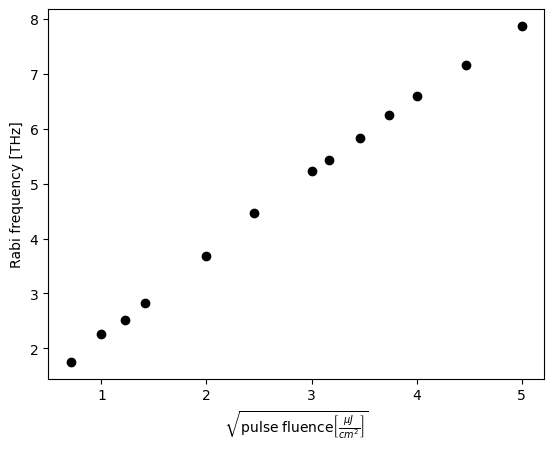

In [81]:
from scipy.signal import find_peaks
# find rabi frequencies from single shortest oscillation
rabi_frequencies = np.zeros_like(fluences)
for i in range(len(fluences)):
    maxima, _ = find_peaks(occupations[i], height=0)
    minima, _ = find_peaks(-occupations[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]
    diffs_maxima = np.diff(tmax_list)
    diffs_minima = np.diff(tmin_list)
    rabi_frequencies[i] = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3

plt.scatter(np.sqrt(fluences), rabi_frequencies, c = 'black')
plt.xlabel(r"$\sqrt{\mathrm{pulse\;fluence} \left[\frac{\mu J}{cm^2}\right]}$")
plt.ylabel('Rabi frequency [THz]')

Add linear fit and rabi frequencies for restriction to linear coulomb interaction

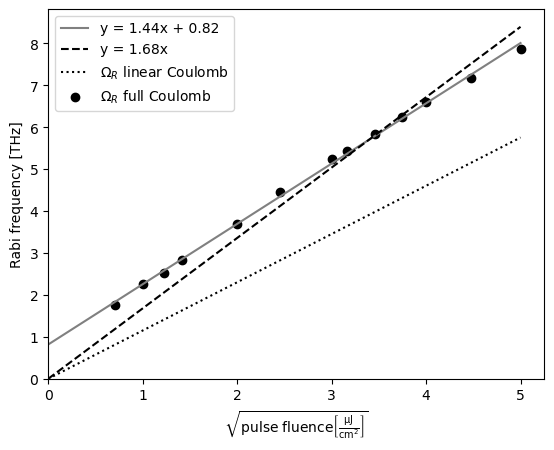

In [82]:
extended_fluences = np.sqrt(np.linspace(0,fluences[-1], 20)) #create equidistant x-values, including zero

coefficients = np.polyfit(np.sqrt(fluences), rabi_frequencies, 1)  # degree 1 for linear
y_with_intercept = np.polyval(coefficients, extended_fluences)
# Fit a linear equation without intercept (y = mx, forcing the offset to be 0)
slope_without_intercept, _, _, _ = np.linalg.lstsq(np.sqrt(fluences).reshape(-1, 1), rabi_frequencies, rcond=None)
y_without_intercept = slope_without_intercept * extended_fluences


# Plot the data points
plt.scatter(np.sqrt(fluences), rabi_frequencies, color='black', label=r'$\Omega_R$ full Coulomb')

# Plot the fitted lines
plt.plot(extended_fluences, y_with_intercept, color='grey', linestyle = '-' , label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.plot(extended_fluences, y_without_intercept, color='black', linestyle='--', label=f'y = {slope_without_intercept[0]:.2f}x')
plt.plot(extended_fluences, np.sqrt(0.68*extended_fluences**2*1*6.24157*1e-2*4*np.sqrt(np.pi)*sigma/(epsilon_0*c*n_medium))*d_cv/(hbar)/(np.sqrt(2*np.pi)*sigma)*1e3, color = 'black', linestyle = 'dotted',label = r'$\Omega_R$ linear Coulomb')
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel(r"$\sqrt{\mathrm{pulse\;fluence} \left[\frac{\mathrm{\mu J}}{\mathrm{cm}^2}\right]}$")
plt.ylabel('Rabi frequency [THz]')
plt.legend()
plt.savefig('results/schuelzgen/figure3.pdf', bbox_inches = 'tight')

Evaluating the Rabi frequencies based on the two shortest oscillations as in the paper, we get:

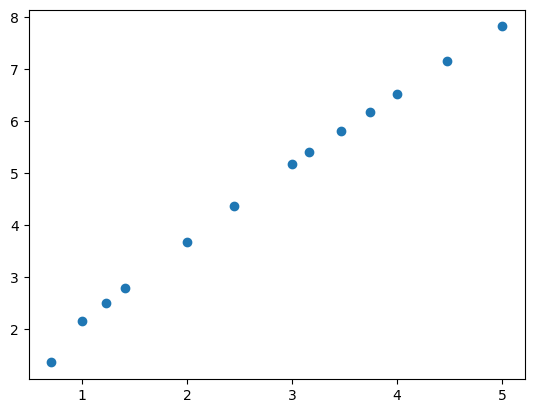

In [9]:
from scipy.signal import find_peaks
# find rabi frequencies from two smallest oscillations
rabi_frequencies = np.zeros_like(fluences)
for i in range(len(fluences)):
    maxima, _ = find_peaks(occupations[i], height=0)
    minima, _ = find_peaks(-occupations[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]
    diffs_maxima = np.diff(tmax_list)
    diffs_minima = np.diff(tmin_list)
    smallest_two = sorted(np.concatenate((diffs_maxima, diffs_minima)))[:2]
    rabi_frequencies[i] = 1/np.mean(smallest_two)*1e3

plt.scatter(np.sqrt(fluences), rabi_frequencies)

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


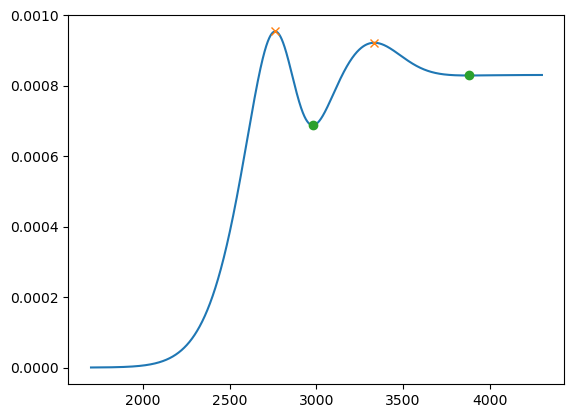

Times of maxima:  [2762.  3333.3]
Times of minima:  [2979.2 3878.4]
[571.3]
[899.2]
1.7503938386136875


In [36]:
from scipy.signal import find_peaks
# look for local maxima and return corresponding time values
i = 0
maxima, _ = find_peaks(occupations[i], height=0)
minima, _ = find_peaks(-occupations[i])
tmax_list = tlist_cropped[maxima]
tmin_list = tlist_cropped[minima]
plt.plot(tlist_cropped,occupations[i])
plt.plot(tmax_list, occupations[i][maxima], "x")
plt.plot(tmin_list, occupations[i][minima], "o")
plt.show()
print('Times of maxima: ', tmax_list)
print('Times of minima: ', tmin_list)
diffs_maxima = np.diff(tmax_list)
diffs_minima = np.diff(tmin_list)
print(diffs_maxima)
print(diffs_minima)
rabi_frequency = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3
print(rabi_frequency)

In [54]:
np.sqrt(0.68*float(16)*1*6.24157*1e-2*4*np.sqrt(np.pi)*sigma/(epsilon_0*c*n_medium))*d_cv/(hbar)/(np.sqrt(2*np.pi)*sigma)*1e3

4.604554789404039